### Non- Linear models for Classification
-[Different algorithms](#Different-algorithms#)
  - Multilayer Neural Networks
  - SVM (non-linear kernels)
  - random forrest




In [1]:
#numeric
import numpy as np
import pandas as pd
# graphics
%matplotlib inline 
import matplotlib.pyplot as plt 
import matplotlib.gridspec as gridspec 
#
#Added version check for recent scikit-learn 0.18 checks
from distutils.version import LooseVersion as Version
from sklearn import __version__ as sklearn_version
###########
from numpy import linalg as LA

####http://rasbt.github.io/mlxtend/


In [2]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):
# setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    #plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
    np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
            alpha=0.8, c=cmap(idx),marker=markers[idx], label=cl)


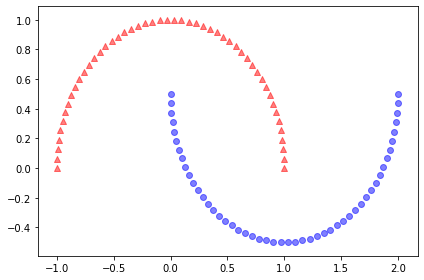

In [3]:
### 
from sklearn.datasets import make_moons

Xtoy, ytoy = make_moons(n_samples=100, random_state=123)

plt.scatter(Xtoy[ytoy == 0, 0], Xtoy[ytoy == 0, 1], color='red', marker='^', alpha=0.5)
plt.scatter(Xtoy[ytoy == 1, 0], Xtoy[ytoy == 1, 1], color='blue', marker='o', alpha=0.5)

plt.tight_layout()
# plt.savefig('./figures/half_moon_1.png', dpi=300)
plt.show()

In [4]:
from sklearn.neural_network import MLPClassifier


mlp = MLPClassifier(activation='tanh', hidden_layer_sizes=(10,5),alpha=0.01, max_iter=5000)
mlp

MLPClassifier(activation='tanh', alpha=0.01, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(10, 5), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=5000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [5]:
mlp.fit(Xtoy,ytoy)

MLPClassifier(activation='tanh', alpha=0.01, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(10, 5), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=5000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


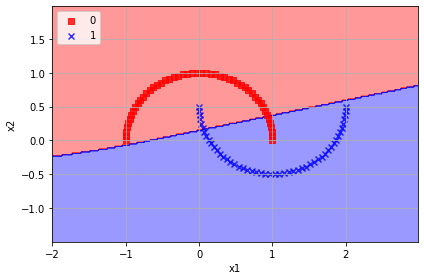

In [6]:
plot_decision_regions(Xtoy, ytoy, classifier=mlp)
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend(loc='upper left')
plt.grid()
plt.tight_layout()
plt.show()


In [ ]:
print('the weights are \n',mlp.coefs_)
print('the bias \n ', mlp.intercepts_)
print('number of iterations \n', mlp.n_iter_)
print('output activation', mlp.out_activation_)

### Question
1. What is the configuration of the network?
2. What are the activation functions?
3. How many iterations were taken to learn the training set.
4. Change the configuration of the network.


# SVM

In [ ]:
from sklearn.svm import SVC

svm=SVC(C=1.0,kernel='rbf', max_iter=1000, tol=1e-05, verbose=0)
svm

In [ ]:
svm=svm.fit(Xtoy,ytoy)
plot_decision_regions(Xtoy, ytoy, classifier=svm)
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend(loc='upper left')
plt.grid()
plt.tight_layout()
plt.show()


In [ ]:

print('dual coef \n', svm.dual_coef_)
print ('support vectors \n', svm.support_vectors_)
print('index of support vectors \n ', svm.support_)
print ('bias', svm.intercept_)
print('the classifier \n', svm)


### Question:

1. The variables printed  are related with the following decision rule
$$
g(\mathbf{z})=\sum \limits_{i=1}^{K_s} \lambda_i d_i\boldsymbol{\phi}^T(\mathbf{x}_i) \boldsymbol(\phi(\mathbf{z})+b
$$
explain how.
2. Create a function that evaluates the decison rule for a new example $(-1,1)$

In [ ]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(max_depth=3, min_samples_split=5,n_estimators=10, max_features='log2', oob_score=False)
forest

In [ ]:
forest.fit(Xtoy,ytoy)
plot_decision_regions(Xtoy, ytoy, classifier=forest)
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend(loc='upper left')
plt.grid()
plt.tight_layout()
plt.show()

In [ ]:
#print('out-of-bag \n', forest.oob_score_)
print('importance\n',forest.feature_importances_)

### Questions
1. Interpret the parameters used to initialize the classifier.
2. How many decision tees has the classifier?
3. Explain the geometry of the decision surface. 
4. Relate the "feature_importance" values with the created decision surface. 
5. There is a parameter called "oob_score" it is initialized as False.  What is the goal of such a parameter? Modify it to True and see the outcome.


### Question:

Apply the previous algorithms to a new data set.

In [ ]:
## The data set

X=np.array([[1,2],[2,3],[3, 3],[4,5],[5,5],[1,0],[2,1],[3,1],[5,3],[6,5]])

print(X.shape)
y=np.array([0,0,0,1,1,1,0,0,1,1])
print(y.shape)

In [ ]:

plt.scatter(X[y==0, 0], X[y==0, 1], color='red', marker='^', alpha=0.8)
plt.scatter(X[y == 1, 0], X[y == 1, 1], color='blue', marker='o', alpha=0.8)
plt.grid()
plt.xlim([-1, 7])
plt.ylim([-1, 6])